Paso 1: Bibliotecas importadas con éxito.

Paso 2: Datos cargados y columnas corregidas a minúsculas.
Columnas actuales: ['tv', 'radio', 'newspaper', 'sales']

--- PASO 3: ANÁLISIS EXPLORATORIO DE DATOS ---

Resumen Estadístico del Dataset:
               tv       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

Visualizando relación TV vs Sales...


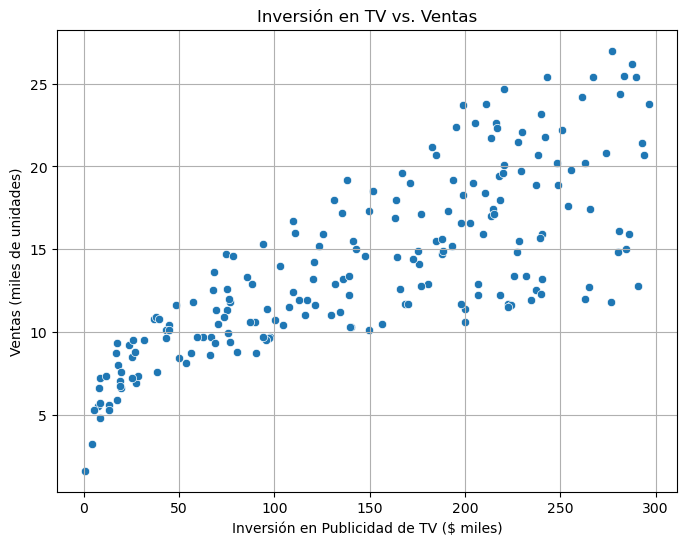


Visualizando correlación entre todas las variables predictoras...


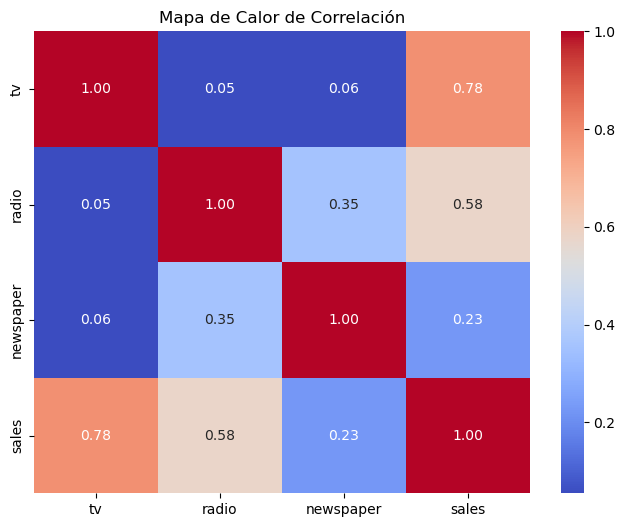


--- PASO 4: Entrenando Modelo 1 (Regresión Simple) ---
Modelo 1 entrenado.

--- PASO 5: Entrenando Modelo 2 (Regresión Múltiple Completa) ---
Modelo 2 entrenado.

--- PASO 6: Entrenando Modelo 3 (Regresión Múltiple Optimizada) ---
Modelo 3 entrenado.


========== CONCLUSIÓN: COMPARACIÓN DE RENDIMIENTO ==========
Modelo 1 (Simple: solo 'tv'):          R² = 0.6714, MAE = 2.2759
Modelo 2 (Múltiple: 3 features):   R² = 0.8609, MAE = 1.5117
Modelo 3 (Optimizado: 2 features): R² = 0.8656, MAE = 1.4759

Coeficientes del Modelo Final (Optimizado):
       Coeficiente
tv        0.044077
radio     0.202606

Intercepto del Modelo Final: 2.8376


In [47]:
# ===================================================================
# PROYECTO: PREDICCIÓN DE VENTAS CON REGRESIÓN LINEAL
# ===================================================================

# PASO 1: CONFIGURACIÓN E IMPORTACIÓN DE BIBLIOTECAS
# -------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

print("Paso 1: Bibliotecas importadas con éxito.")

# ===================================================================

# PASO 2: CARGA Y PREPARACIÓN DE DATOS
# -------------------------------------------------------------------
url = 'https://www.statlearning.com/s/Advertising.csv'
data = pd.read_csv(url, index_col=0)

# Corrección: Convertir todos los nombres de columnas a minúsculas.
data.columns = data.columns.str.lower()

print("\nPaso 2: Datos cargados y columnas corregidas a minúsculas.")
print("Columnas actuales:", data.columns.tolist())

# ===================================================================

# PASO 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA / ADA)
# -------------------------------------------------------------------
print("\n--- PASO 3: ANÁLISIS EXPLORATORIO DE DATOS ---")

# Resumen estadístico
print("\nResumen Estadístico del Dataset:")
print(data.describe())

# Visualización de la relación TV vs Sales (del modelo simple)
print("\nVisualizando relación TV vs Sales...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tv', y='sales', data=data)
plt.title('Inversión en TV vs. Ventas')
plt.xlabel('Inversión en Publicidad de TV ($ miles)')
plt.ylabel('Ventas (miles de unidades)')
plt.grid(True)
plt.show()

# Mapa de calor de correlación para todas las features
print("\nVisualizando correlación entre todas las variables predictoras...")
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

# ===================================================================

# PASO 4: MODELO 1 - REGRESIÓN LINEAL SIMPLE (LÍNEA BASE)
# -------------------------------------------------------------------
print("\n--- PASO 4: Entrenando Modelo 1 (Regresión Simple) ---")
X_simple = data[['tv']]
y = data['sales']

X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.3, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)
y_pred_simple = model_simple.predict(X_test_simple)

r2_simple = r2_score(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
print("Modelo 1 entrenado.")

# ===================================================================

# PASO 5: MODELO 2 - REGRESIÓN LINEAL MÚLTIPLE (TODAS LAS FEATURES)
# -------------------------------------------------------------------
print("\n--- PASO 5: Entrenando Modelo 2 (Regresión Múltiple Completa) ---")
features_multiple = ['tv', 'radio', 'newspaper']
X_multiple = data[features_multiple]

X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.3, random_state=42)
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train)
y_pred_multiple = model_multiple.predict(X_test_multiple)

r2_multiple = r2_score(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
print("Modelo 2 entrenado.")

# ===================================================================

# PASO 6: MODELO 3 - REGRESIÓN MÚLTIPLE OPTIMIZADA (FEATURES SELECCIONADAS)
# -------------------------------------------------------------------
print("\n--- PASO 6: Entrenando Modelo 3 (Regresión Múltiple Optimizada) ---")
features_optim = ['tv', 'radio']
X_optim = data[features_optim]

X_train_optim, X_test_optim, y_train, y_test = train_test_split(X_optim, y, test_size=0.3, random_state=42)
model_optim = LinearRegression()
model_optim.fit(X_train_optim, y_train)
y_pred_optim = model_optim.predict(X_test_optim)

r2_optim = r2_score(y_test, y_pred_optim)
mae_optim = mean_absolute_error(y_test, y_pred_optim)
print("Modelo 3 entrenado.")

# ===================================================================

# PASO 7: CONCLUSIÓN - COMPARACIÓN FINAL DE MODELOS
# -------------------------------------------------------------------
print("\n\n========== CONCLUSIÓN: COMPARACIÓN DE RENDIMIENTO ==========")
print(f"Modelo 1 (Simple: solo 'tv'):          R² = {r2_simple:.4f}, MAE = {mae_simple:.4f}")
print(f"Modelo 2 (Múltiple: 3 features):   R² = {r2_multiple:.4f}, MAE = {mae_multiple:.4f}")
print(f"Modelo 3 (Optimizado: 2 features): R² = {r2_optim:.4f}, MAE = {mae_optim:.4f}")
print("==========================================================")

# Mostramos los coeficientes del modelo final y ganador
print("\nCoeficientes del Modelo Final (Optimizado):")
coeficientes_finales = pd.DataFrame(model_optim.coef_, features_optim, columns=['Coeficiente'])
print(coeficientes_finales)
print(f"\nIntercepto del Modelo Final: {model_optim.intercept_:.4f}")